# EcoSmart City Planners - Energy Dataset Analysis

This notebook covers:
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Basic Visualizations
- Advanced Visualizations
- Insights and Recommendations

# Importing Required Libraries

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
# prompt: code to link drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/eco_energy_dataset.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Household_ID             1500 non-null   int64  
 1   Num_Residents            1500 non-null   int64  
 2   Income_Level             1500 non-null   object 
 3   Energy_Consumption_kWh   1470 non-null   float64
 4   Appliance_Usage_Percent  1470 non-null   float64
 5   Season                   1500 non-null   object 
 6   Location                 1500 non-null   object 
 7   Smart_Appliance_Usage_%  1470 non-null   float64
 8   Energy_Saving_Awareness  1500 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 105.6+ KB


,Household_ID,Num_Residents,Energy_Consumption_kWh,Appliance_Usage_Percent,Smart_Appliance_Usage_%,Energy_Saving_Awareness
count,1500.000000,1500.000000,1470.000000,1470.000000,1470.000000,1500.000000
mean,750.500000,3.482667,807.788939,69.455487,27.585748,2.992667
std,433.157015,1.722695,300.808565,14.421505,12.837120,1.404966
min,1.000000,1.000000,-216.040000,24.311068,5.010000,1.000000
25%,375.750000,2.000000,602.212500,59.476918,16.755000,2.000000
50%,750.500000,3.000000,810.380000,69.445148,27.895000,3.000000
75%,1125.250000,5.000000,1020.952500,79.843027,38.627500,4.000000
max,1500.000000,6.000000,1848.760000,100.000000,49.980000,5.000000


#Data Cleaning

In [7]:
# Handling Missing Values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Household_ID                0
Num_Residents               0
Income_Level                0
Energy_Consumption_kWh     30
Appliance_Usage_Percent    30
Season                      0
Location                    0
Smart_Appliance_Usage_%    30
Energy_Saving_Awareness     0
dtype: int64


In [8]:
#Filling missing 'Energy Consumption (kWh)' with the mean
if 'Energy Consumption (kWh)' in df.columns:
    df['Energy Consumption (kWh)'].fillna(df['Energy Consumption (kWh)'].mean(), inplace=True)

In [9]:
#Droping rows where 'Building Type' is missing
if 'Building Type' in df.columns:
    df.dropna(subset=['Building Type'], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Household_ID                0
Num_Residents               0
Income_Level                0
Energy_Consumption_kWh     30
Appliance_Usage_Percent    30
Season                      0
Location                    0
Smart_Appliance_Usage_%    30
Energy_Saving_Awareness     0
dtype: int64


In [10]:
# Handling Duplicates
print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", df.duplicated().sum())


Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


In [11]:
# Handling Data Types
print("\nData types before cleaning:")
print(df.dtypes)


Data types before cleaning:
Household_ID                 int64
Num_Residents                int64
Income_Level                object
Energy_Consumption_kWh     float64
Appliance_Usage_Percent    float64
Season                      object
Location                    object
Smart_Appliance_Usage_%    float64
Energy_Saving_Awareness      int64
dtype: object


In [12]:
#Converting 'Date' column to datetime objects if it exists
if 'Date' in df.columns:
    # Assuming 'Date' is in a standard format like YYYY-MM-DD
    try:
        df['Date'] = pd.to_datetime(df['Date'])
    except Exception as e:
        print(f"Could not convert 'Date' column to datetime: {e}")

print("\nData types after handling:")
print(df.dtypes)


Data types after handling:
Household_ID                 int64
Num_Residents                int64
Income_Level                object
Energy_Consumption_kWh     float64
Appliance_Usage_Percent    float64
Season                      object
Location                    object
Smart_Appliance_Usage_%    float64
Energy_Saving_Awareness      int64
dtype: object


In [13]:
# Handling Outliers ('Energy Consumption (kWh)')
if 'Energy Consumption (kWh)' in df.columns:
    Q1 = df('Energy Consumption (kWh)').quantile(0.25)
    Q3 = df('Energy Consumption (kWh)').quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Cap outliers
    df['Energy Consumption (kWh)'] = df['Energy Consumption (kWh)'].clip(lower=lower_bound, upper=upper_bound)

    # Remove outliers
    print("\nHandled outliers in 'Energy Consumption (kWh)'.")

In [14]:
# Consistency and Formatting (Standardize 'Building Type' casing)
if 'Building Type' in df.columns:
    df['Building Type'] = df['Building Type'].str.lower().str.strip()
    print("\nStandardized 'Building Type' casing.")

In [15]:
# Displaying info after cleaning
print("\nDataset Info after Cleaning:")
df.info()


Dataset Info after Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Household_ID             1500 non-null   int64  
 1   Num_Residents            1500 non-null   int64  
 2   Income_Level             1500 non-null   object 
 3   Energy_Consumption_kWh   1470 non-null   float64
 4   Appliance_Usage_Percent  1470 non-null   float64
 5   Season                   1500 non-null   object 
 6   Location                 1500 non-null   object 
 7   Smart_Appliance_Usage_%  1470 non-null   float64
 8   Energy_Saving_Awareness  1500 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 105.6+ KB


In [16]:
# Displaying the first few rows after cleaning
print("\nFirst 5 rows after cleaning:")
print(df.head())


First 5 rows after cleaning:
   Household_ID  Num_Residents Income_Level  Energy_Consumption_kWh  \
0             1              4          Low                 1424.70   
1             2              5          Low                  452.80   
2             3              3       Medium                  733.45   
3             4              5         High                 1002.32   
4             5              5         High                  960.92   

   Appliance_Usage_Percent  Season  Location  Smart_Appliance_Usage_%  \
0                66.061895  Autumn     Rural                    13.94   
1                62.479519  Winter     Urban                    17.63   
2                55.567162  Summer  Suburban                    49.97   
3                77.536709  Spring     Urban                    17.06   
4                67.615964  Autumn     Rural                    19.80   

   Energy_Saving_Awareness  
0                        4  
1                        3  
2                

# Exploratory Data Analysis (EDA)

In [17]:
#Summary of Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Household_ID  Num_Residents  Energy_Consumption_kWh  \
count   1500.000000    1500.000000             1470.000000   
mean     750.500000       3.482667              807.788939   
std      433.157015       1.722695              300.808565   
min        1.000000       1.000000             -216.040000   
25%      375.750000       2.000000              602.212500   
50%      750.500000       3.000000              810.380000   
75%     1125.250000       5.000000             1020.952500   
max     1500.000000       6.000000             1848.760000   

       Appliance_Usage_Percent  Smart_Appliance_Usage_%  \
count              1470.000000              1470.000000   
mean                 69.455487                27.585748   
std                  14.421505                12.837120   
min                  24.311068                 5.010000   
25%                  59.476918                16.755000   
50%                  69.445148                27.895000   
75%    

In [18]:
# Summary statistics for categorical data
print("\nSummary of Building Types:")
print(df.columns)
print("\nSummary of Location:")
if 'Location' in df.columns:
    print(df['Location'].value_counts())
else:
    print("The 'Location' column does not exist in the DataFrame.")


Summary of Building Types:
Index(['Household_ID', 'Num_Residents', 'Income_Level',
       'Energy_Consumption_kWh', 'Appliance_Usage_Percent', 'Season',
       'Location', 'Smart_Appliance_Usage_%', 'Energy_Saving_Awareness'],
      dtype='object')

Summary of Location:
Location
Urban       861
Suburban    485
Rural       154
Name: count, dtype: int64


In [19]:
# Summary statistics
df.describe(include='all')

,Household_ID,Num_Residents,Income_Level,Energy_Consumption_kWh,Appliance_Usage_Percent,Season,Location,Smart_Appliance_Usage_%,Energy_Saving_Awareness
count,1500.000000,1500.000000,1500,1470.000000,1470.000000,1500,1500,1470.000000,1500.000000
unique,NaN,NaN,3,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,Medium,NaN,NaN,Winter,Urban,NaN,NaN
freq,NaN,NaN,757,NaN,NaN,389,861,NaN,NaN
mean,750.500000,3.482667,NaN,807.788939,69.455487,NaN,NaN,27.585748,2.992667
std,433.157015,1.722695,NaN,300.808565,14.421505,NaN,NaN,12.837120,1.404966
min,1.000000,1.000000,NaN,-216.040000,24.311068,NaN,NaN,5.010000,1.000000
25%,375.750000,2.000000,NaN,602.212500,59.476918,NaN,NaN,16.755000,2.000000
50%,750.500000,3.000000,NaN,810.380000,69.445148,NaN,NaN,27.895000,3.000000
75%,1125.250000,5.000000,NaN,1020.952500,79.843027,NaN,NaN,38.627500,4.000000


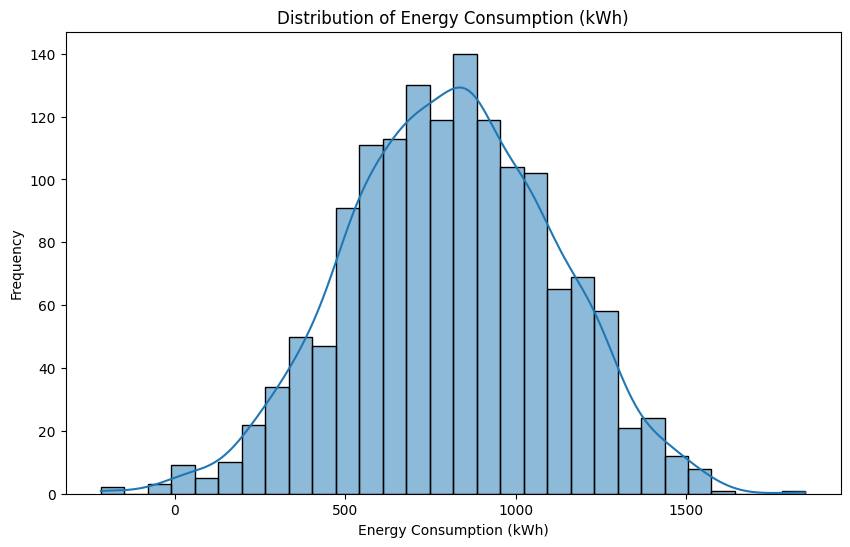

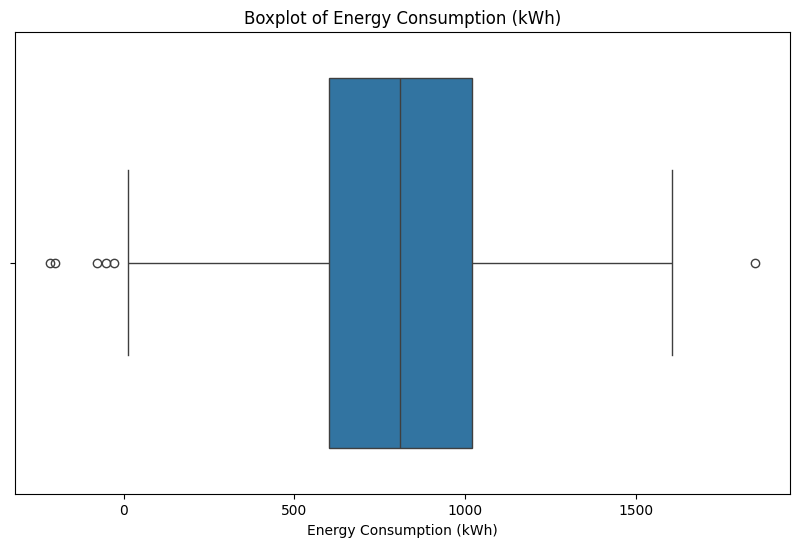

In [20]:
#Distribution of Energy Consumption

plt.figure(figsize=(10, 6))
sns.histplot(df['Energy_Consumption_kWh'], kde=True, bins=30)
plt.title('Distribution of Energy Consumption (kWh)')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Energy_Consumption_kWh'])
plt.title('Boxplot of Energy Consumption (kWh)')
plt.xlabel('Energy Consumption (kWh)')
plt.show()

<ipython-input-21-955746849>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Energy_Consumption_kWh', data=df, ci=None)


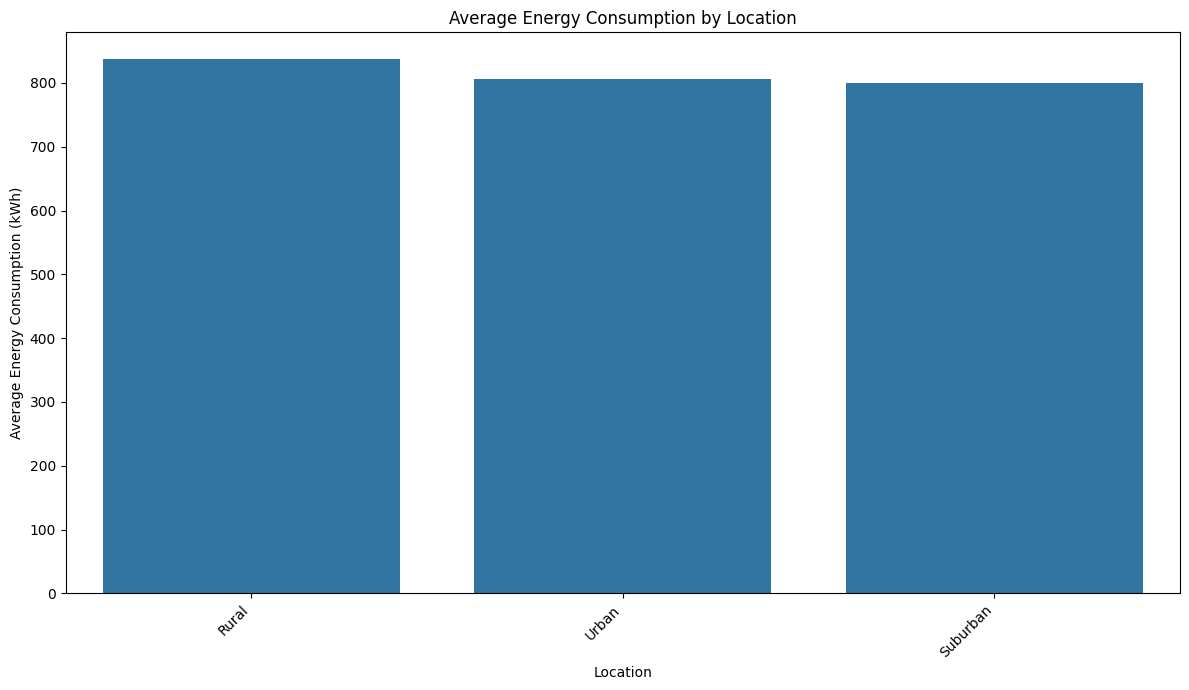

<ipython-input-21-955746849>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Energy_Consumption_kWh', data=df, ci=None)


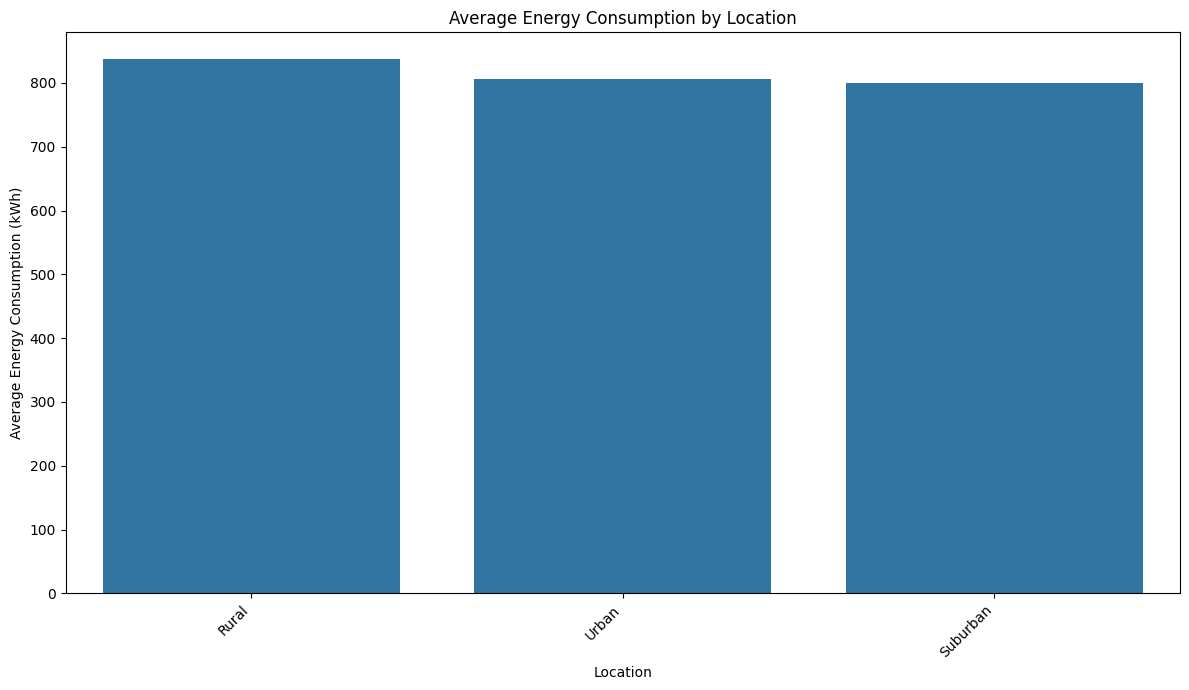

In [21]:
#High-Energy Consumption Patterns by Building Type and Location

plt.figure(figsize=(12, 7))
sns.barplot(x='Location', y='Energy_Consumption_kWh', data=df, ci=None)
plt.title('Average Energy Consumption by Location')
plt.xlabel('Location')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(x='Location', y='Energy_Consumption_kWh', data=df, ci=None)
plt.title('Average Energy Consumption by Location')
plt.xlabel('Location')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

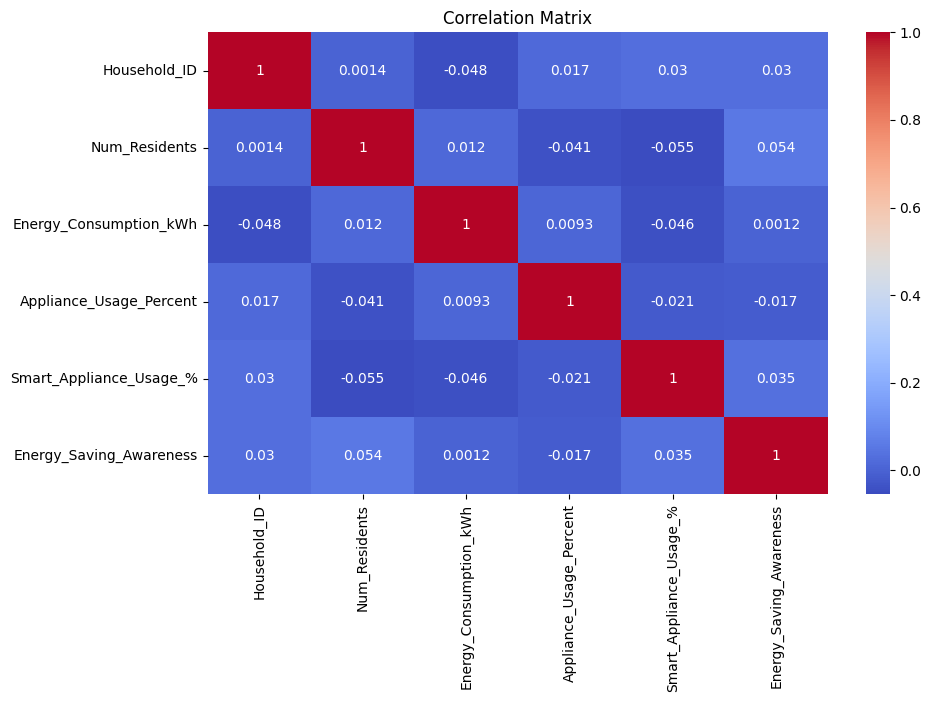

In [22]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Basic Visualizations

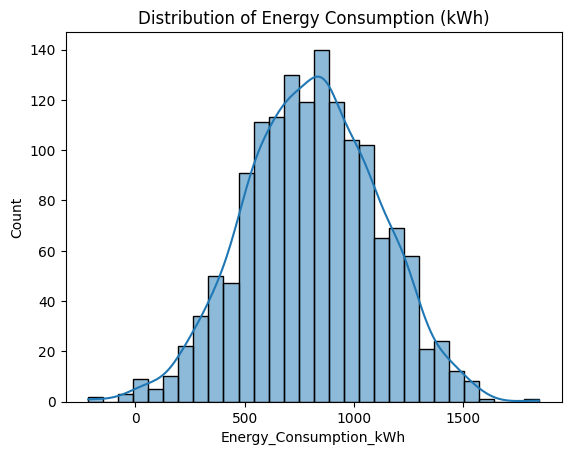

In [23]:
# Histogram of energy consumption
sns.histplot(df['Energy_Consumption_kWh'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption (kWh)')
plt.show()


<ipython-input-30-2289825329>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Income_Level', y='Energy_Consumption_kWh', ci=None)


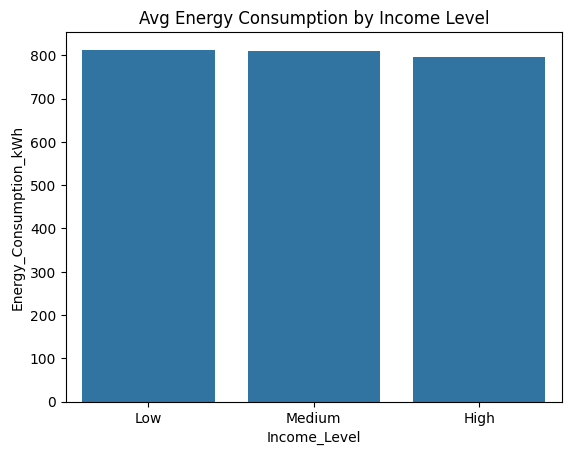

In [30]:
# Bar chart: Average consumption by income level
sns.barplot(data=df, x='Income_Level', y='Energy_Consumption_kWh', ci=None)
plt.title('Avg Energy Consumption by Income Level')
plt.show()

## Advanced Visualizations

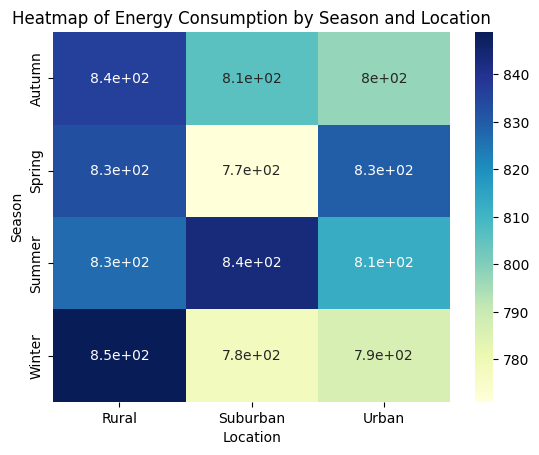

In [25]:
# Heatmap: Average consumption by season and location
pivot = df.pivot_table(values='Energy_Consumption_kWh', index='Season', columns='Location')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Energy Consumption by Season and Location')
plt.show()

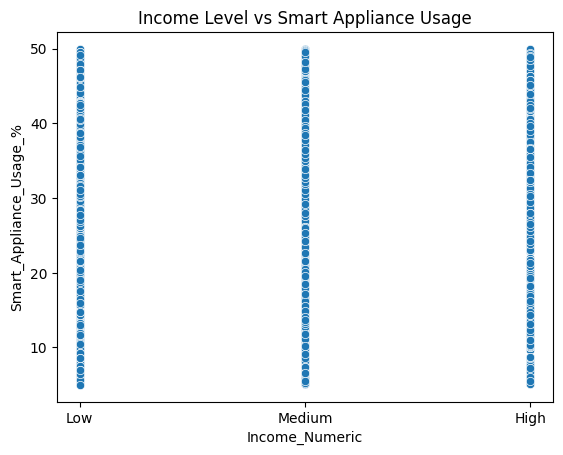

In [26]:
# Scatterplot: Income Level vs Smart Appliance Usage
income_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Income_Numeric'] = df['Income_Level'].map(income_map)
sns.scatterplot(data=df, x='Income_Numeric', y='Smart_Appliance_Usage_%')
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])
plt.title('Income Level vs Smart Appliance Usage')
plt.show()

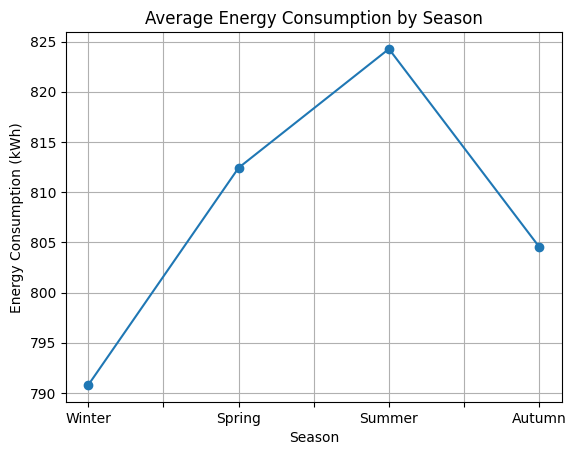

In [27]:
# Line plot: Seasonal trends in energy usage
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
df_season = df.groupby('Season')['Energy_Consumption_kWh'].mean().reindex(season_order)
df_season.plot(kind='line', marker='o')
plt.title('Average Energy Consumption by Season')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Season')
plt.grid(True)
plt.show()